<a href="https://colab.research.google.com/github/nirvanK11/Sentiment-analysis/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)

(16363, 3)


In [ ]:
df_train.isnull().any()

Id           False
Text         False
Sentiment    False
dtype: bool

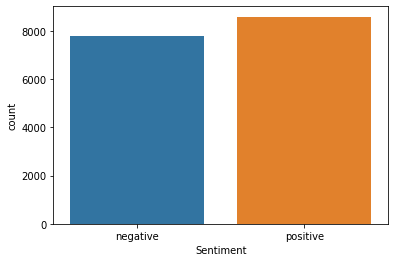

In [ ]:
# Summarise class details
sns.countplot(x=df_train['Sentiment'])

In [ ]:
# drop the rows where at least one element is missing
df_train = df_train.dropna()

In [ ]:
print(f'Number of entries: {len(df_train)}')

Number of entries: 16363


***Tokenisation***

In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df_train['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df_train['Tokenised_Text'] = list_tokenised_sentences
df_train.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of **** , why couldn`t they put them on t..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...


Text ***Normalisation***

In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df_train['Lemmatised_Text'] = list_lemmatised_sentences

df_train.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of **** , why couldn`t they put them on t...","Sons of **** , why couldn`t they put them on t..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


Stop word ***removal***

In [ ]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'shan', 'd', 'hers', "you've", 'while', 'then', 'yours', 'same', 'will', 'very', 'is', 'll', 'was', 'y', 'where', 'after', 't', 'themselves', "wouldn't", 'both', 'can', 'in', 'doing', 'o', 'but', 'ours', 'more', 'myself', 'mustn', 'any', 'do', 'isn', 'i', "hasn't", "haven't", 'only', "needn't", 'she', 'had', "weren't", "she's", 'over', "isn't", 'through', 'it', "mightn't", 'so', 'which', 'did', 'your', 'its', "doesn't", 'as', 'these', "shan't", 'why', 'himself', 'their', 'how', 'mightn', 'those', 'during', 'the', 'his', 'won', 'having', 'against', 'yourselves', 'wouldn', 'been', 'a', 'that', 'theirs', 'about', 'couldn', "mustn't", 'for', 'than', "you'd", 'some', 'this', "couldn't", 'he', "you'll", 'whom', 'few', 'all', 'and', 'be', 'wasn', 's', "wasn't", 'because', 'now', 'aren', 'hasn', 'have', 'further', 'between', 'being', 'needn', 'not', 'to', 'ourselves', "don't", 'by', "didn't", 'other', 'were', 'until', 'again', 'or', 'does', 'if', 'from', 'm', 'nor', 'you', 'are', 'me', 'doesn

Text feature extraction and model ***generation***

In [ ]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(df_train['Text'], df_train['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df_train['Tokenised_Text'], df_train['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df_train['Lemmatised_Text'], df_train['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

Support Vector ***Machine***

In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

M_1

Accuracy: 0.8602566714198411


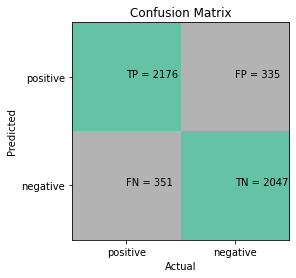

In [ ]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

M_2

Accuracy: 0.8690160928906091


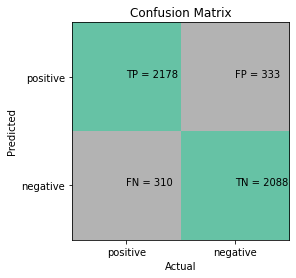

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

M_3

Accuracy: 0.8690160928906091


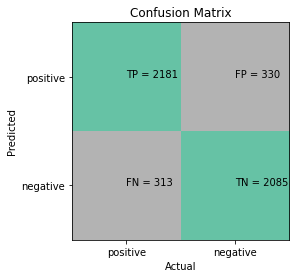

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m3= get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

M_4

Accuracy: 0.8688123854145448


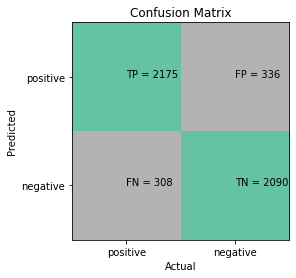

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

M_5

Accuracy: 0.8578121817070686


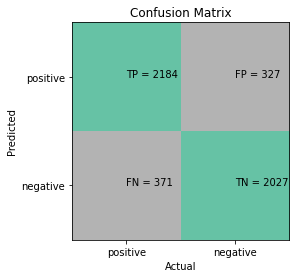

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m5 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

M_6

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m6 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

DECISION TREE

M_7

In [ ]:
# method to train and predict using Decision Tree
def get_dt_predictions(X_train, X_val, y_train, y_val, class_list):
  # build model
  clf = tree.DecisionTreeClassifier(random_state=RANDOM_SEED)
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_list)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_list)

  return clf

M_8

Accuracy: 0.8056630678345895


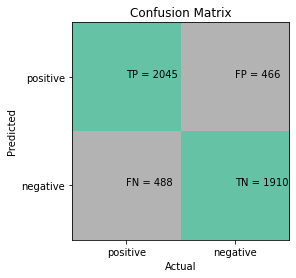

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m8 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

M_9

Accuracy: 0.7934406192707273


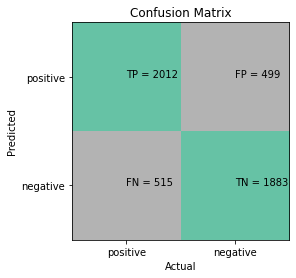

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m9 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

M_10

Accuracy: 0.7989407211244652


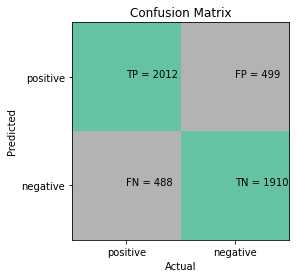

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m10 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

M_11

Accuracy: 0.8115705846404563


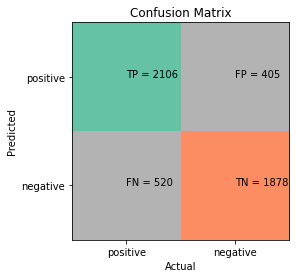

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m11 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

M_12

Accuracy: 0.8085149724994908


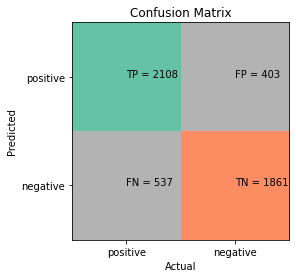

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m12 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

***PREDICTIONS***

In [ ]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)

(1000, 2)


In [ ]:
df_test.head()

,Id,Text
0,96d74cb729,Shanghai is also really exciting (precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!


In [ ]:
df_test.isnull().sum()

Id      0
Text    0
dtype: int64

***Tokenisation***

In [ ]:
# drop the rows where at least one element is missing
df_test = df_test.dropna()

print(f'Number of entries: {len(df_test)}')

Number of entries: 1000


In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df_test['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df_test['Tokenised_Text'] = list_tokenised_sentences
df_test.head()

[['Shanghai', 'is', 'also', 'really', 'exciting', '(', 'precisely', '--', 'skyscrapers', 'galore', ')', '.', 'Good', 'tweeps', 'in', 'China', ':', '(', 'SH', ')', '(', 'BJ', ')', '.'], ['Recession', 'hit', 'Veronique', 'Branquinho', ',', 'she', 'has', 'to', 'quit', 'her', 'company', ',', 'such', 'a', 'shame', '!']]
['Shanghai is also really exciting ( precisely -- skyscrapers galore ) . Good tweeps in China : ( SH ) ( BJ ) .', 'Recession hit Veronique Branquinho , she has to quit her company , such a shame !']


,Id,Text,Tokenised_Text
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t..."
2,01082688c6,happy bday!,happy bday !
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http : //twitpic.com/4w75p - I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that`s great ! ! weee ! ! visitors !


Text Normalisation

In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df_test['Lemmatised_Text'] = list_lemmatised_sentences

df_test.head()

['Shanghai is also really exciting ( precisely -- skyscraper galore ) . Good tweeps in China : ( SH ) ( BJ ) .', 'Recession hit Veronique Branquinho , she ha to quit her company , such a shame !']


,Id,Text,Tokenised_Text,Lemmatised_Text
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...,Shanghai is also really exciting ( precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t...","Recession hit Veronique Branquinho , she ha to..."
2,01082688c6,happy bday!,happy bday !,happy bday !
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http : //twitpic.com/4w75p - I like it ! !,http : //twitpic.com/4w75p - I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that`s great ! ! weee ! ! visitors !,that`s great ! ! weee ! ! visitor !


Stop word removal

In [ ]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'shan', 'd', 'hers', "you've", 'while', 'then', 'yours', 'same', 'will', 'very', 'is', 'll', 'was', 'y', 'where', 'after', 't', 'themselves', "wouldn't", 'both', 'can', 'in', 'doing', 'o', 'but', 'ours', 'more', 'myself', 'mustn', 'any', 'do', 'isn', 'i', "hasn't", "haven't", 'only', "needn't", 'she', 'had', "weren't", "she's", 'over', "isn't", 'through', 'it', "mightn't", 'so', 'which', 'did', 'your', 'its', "doesn't", 'as', 'these', "shan't", 'why', 'himself', 'their', 'how', 'mightn', 'those', 'during', 'the', 'his', 'won', 'having', 'against', 'yourselves', 'wouldn', 'been', 'a', 'that', 'theirs', 'about', 'couldn', "mustn't", 'for', 'than', "you'd", 'some', 'this', "couldn't", 'he', "you'll", 'whom', 'few', 'all', 'and', 'be', 'wasn', 's', "wasn't", 'because', 'now', 'aren', 'hasn', 'have', 'further', 'between', 'being', 'needn', 'not', 'to', 'ourselves', "don't", 'by', "didn't", 'other', 'were', 'until', 'again', 'or', 'does', 'if', 'from', 'm', 'nor', 'you', 'are', 'me', 'doesn

According to our results, the best model so far is model M_3. Lemmatization and stop word removal don't improve the accuracy of the model for this data.

Accuracy: 0.8690160928906091


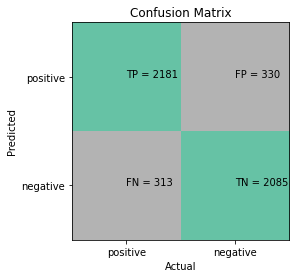

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2= get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

In [ ]:
data = df_test['Tokenised_Text']

In [ ]:
#make predictions using the best model
X_test = vectorizer.transform(data)
predictions = m2.predict(X_test)
print(predictions)

['positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'posit

In [ ]:
df_test['Sentiment'] = predictions

In [ ]:
df_test.to_csv('/content/test-predictions.csv', index = False)

In [ ]:
df1 = pd.read_csv('/content/test-predictions.csv')
df1

,Id,Text,Tokenised_Text,Lemmatised_Text,Sentiment
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...,Shanghai is also really exciting ( precisely -...,positive
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t...","Recession hit Veronique Branquinho , she ha to...",negative
2,01082688c6,happy bday!,happy bday !,happy bday !,positive
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http : //twitpic.com/4w75p - I like it ! !,http : //twitpic.com/4w75p - I like it ! !,positive
4,726e501993,that`s great!! weee!! visitors!,that`s great ! ! weee ! ! visitors !,that`s great ! ! weee ! ! visitor !,positive
...,...,...,...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!,Haha ... YAY ! ! ! I`M CURED ! ! ! !,Haha ... YAY ! ! ! I`M CURED ! ! ! !,positive
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even bre...","Sick , sick , sick . This sucks . i can`t even...","Sick , sick , sick . This suck . i can`t even ...",negative
997,6cadda7b98,Adding names to my Twitter account and learnin...,Adding names to my Twitter account and learnin...,Adding name to my Twitter account and learning...,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned...,ooh thats an early start ive got bed planned f...,ooh thats an early start ive got bed planned f...,positive


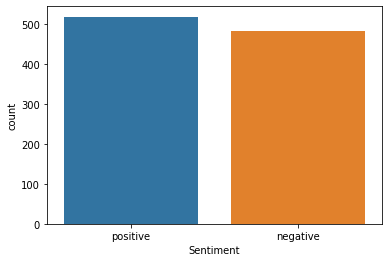

In [ ]:
# Summarise class details
sns.countplot(x=df1['Sentiment'])

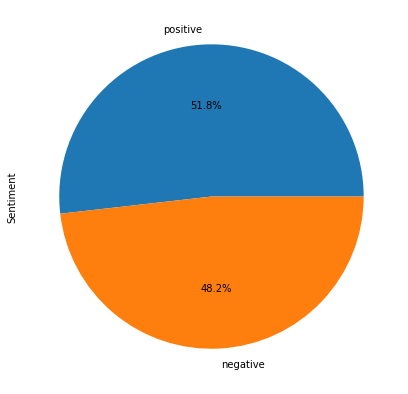

In [ ]:
df1["Sentiment"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7));